In [1]:
import os
import sys
import gzip
import gpxpy
import shutil
import fitdecode
import gpxpy.gpx
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

strava_export = "c:\\Users\\matti\\Desktop\\Garmin IQ datafield\\export_105647830\\activities"

import parse_fit
import parse_gpx
import parse_tcx

pd.options.display.max_columns = 100

%load_ext autoreload
%autoreload 2

https://towardsdatascience.com/parsing-fitness-tracker-data-with-python-a59e7dc17418

In [19]:
###########################################
####### GET DATA COMPUTED BY STRAVA #######
###########################################

activities_df = pd.read_csv(strava_export + ".csv")
activities_df["Filename"] = activities_df["Filename"].apply(lambda v: v if pd.isnull(v)
                                                            else v.split("/")[1].replace(".gz", ""))

```python
#######################
### UNZIP ALL FILES ###
#######################
for filename in os.listdir(strava_export):
    if filename.endswith('.gz') and filename.replace(".gz", "") not in os.listdir(strava_export): 
    print(filename)
    with gzip.open("\\".join((strava_export, filename)), 'rb') as f_in:
        with open("\\".join((strava_export, filename))[:-3], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
```

In [3]:
list_of_fit_files = ["\\".join((strava_export, v)) for v in os.listdir(strava_export)
                     if ".gpx" not in v and ".gz" not in v]
list_of_gpx_files = ["\\".join((strava_export, v)) for v in os.listdir(strava_export)
                     if ".gpx" in v]

In [4]:
##########################################
### GET TO DATAFRAME PER EACH FIT FILE ###
##########################################
list_of_dfs_fit_points = []
list_of_dfs_fit_laps = []
for file in tqdm(list_of_fit_files):
    d_ = parse_fit.get_dataframes(file)
    list_of_dfs_fit_laps.append(d_[0])
    list_of_dfs_fit_points.append(d_[1])

fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
fit_file_points = pd.concat(list_of_dfs_fit_points, ignore_index = True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 117/117 [09:16<00:00,  4.75s/it]
C:\Users\matti\AppData\Local\Temp\ipykernel_18792\4025744445.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fit_file_laps = pd.concat(list_of_dfs_fit_laps, ignore_index = True)
C:\Users\matti\AppData\Local\Temp\ipykernel_18792\4025744445.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain t

In [32]:
fit_file_points = fit_file_points.merge(activities_df, left_on = "FileName", right_on = "Filename", how = "left")
fit_file_laps = fit_file_laps.merge(activities_df, left_on = "FileName", right_on = "Filename", how = "left")

In [38]:
# SAVE FILES TO AVOID RECOMPUTING EACH TIME
fit_file_laps.to_parquet(".\\data\\fit_file_laps.parquet")
fit_file_points.to_parquet(".\\data\\fit_file_points.parquet")

In [194]:
[d for d in list_of_dfs_fit_points
 if d[["altitude", "cadence", "calories", "distance",
       "speed", "grade", "heart_rate", "temperature"]].isnull().sum().sum()/len(d)*8 < 0.05][6]

FileName   latitude  longitude  lap  altitude  cadence  \
0      10710188514.fit  45.462326   9.132765    1       NaN      NaN   
1      10710188514.fit  45.462325   9.132768    1       NaN      NaN   
2      10710188514.fit  45.462307   9.132850    1       NaN      0.0   
3      10710188514.fit  45.462308   9.132862    1       NaN      0.0   
4      10710188514.fit  45.462309   9.132871    1       NaN      0.0   
...                ...        ...        ...  ...       ...      ...   
26660  10710188514.fit  45.462622   9.132907    5     120.8      0.0   
26661  10710188514.fit  45.462604   9.132901    5     120.8      0.0   
26662  10710188514.fit  45.462584   9.132896    5     120.8      0.0   
26663  10710188514.fit  45.462559   9.132893    5     120.8      0.0   
26664  10710188514.fit  45.462534   9.132901    5     120.8      0.0   

       calories  compressed_speed_distance  cycle_length   distance  \
0             0                        NaN           NaN       0.00   
1             0                        NaN           NaN       0.00   
2             0                        NaN           NaN       0.31   
3             0                        NaN           NaN       0.31   
4             0                        NaN           NaN       0.31   
...         ...                        ...           ...        ...   
26660      5183                        NaN           NaN  143115.43   
26661      5183                        NaN           NaN  143117.41   
26662      5183                        NaN           NaN  143119.76   
26663      5183                        NaN           NaN  143122.50   
26664      5183                        NaN           NaN  143125.41   

       enhanced_altitude  enhanced_speed  grade  heart_rate  position_lat  \
0                    NaN           0.000    0.0         NaN     542386674   
1                    NaN           0.000    0.0        93.0     542386662   
2                    NaN           0.725    0.0        88.0     542386445   
3                    NaN           0.000    0.0        89.0     542386459   
4                    NaN           0.000    0.0        90.0     542386479   
...                  ...             ...    ...         ...           ...   
26660              120.8           2.086    0.0       113.0     542390203   
26661              120.8           1.961    0.0       113.0     542389998   
26662              120.8           2.697    0.0       114.0     542389750   
26663              120.8           2.902    0.0       114.0     542389457   
26664              120.8           3.438    0.0       116.0     542389153   

       position_long  power  resistance  speed  temperature  time_from_course  \
0          108958136    NaN         NaN  0.000           24               NaN   
1          108958172    NaN         NaN  0.000           24               NaN   
2          108959150    NaN         NaN  0.725           24               NaN   
3          108959287    NaN         NaN  0.000           24               NaN   
4          108959393    NaN         NaN  0.000           24               NaN   
...              ...    ...         ...    ...          ...               ...   
26660      108959830    NaN         NaN  2.086           26               NaN   
26661      108959751    NaN         NaN  1.961           26               NaN   
26662      108959695    NaN         NaN  2.697           26               NaN   
26663      108959659    NaN         NaN  2.902           26               NaN   
26664      108959759    NaN         NaN  3.438           26               NaN   

                      timestamp  
0     2023-10-07 06:18:44+00:00  
1     2023-10-07 06:18:45+00:00  
2     2023-10-07 06:19:00+00:00  
3     2023-10-07 06:19:01+00:00  
4     2023-10-07 06:19:02+00:00  
...                         ...  
26660 2023-10-07 16:20:08+00:00  
26661 2023-10-07 16:20:09+00:00  
26662 2023-10-07 16:20:10+00:00  
26663 2023-10-07 16:20:11+00:00  
26664 2023-10-07 16:20:1

In [47]:
sorted(activities_df["Activity Name"])[::-1][:10]

['Zwift - Zwift Academy: Workout 1 | Explosive 30s in Yorkshire',
 'Zwift - Zwift Academy Tri:  Bike Workout 2 | Aerobic Threshold Development in Watopia',
 'Zwift - Zone 3 Steps in Makuri Islands',
 'Zwift - Zone 1 Ride in Innsbruck',
 'Zwift - Workout 13 in New York',
 'Zwift - Volcano Climb Forward in Watopia',
 'Zwift - Triple Flat Loops in Watopia',
 'Zwift - Tiny Race: Seaside Sprint in Watopia',
 'Zwift - Threshold Development in France',
 'Zwift - Threshold #2 in Watopia']

In [90]:
# activities_df[activities_df["Activity Name"] == "Back to salite in real life"] # Zwift - The Pretzel in Watopia
activities_df[activities_df["Activity Name"] == "Zwift - The Pretzel in Watopia"] # 

Activity ID             Activity Date                   Activity Name  \
132  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   

    Activity Type          Activity Description  Elapsed Time  Distance  \
132  Virtual Ride  Ride to improve PBs on hills         11086     73.07   

     Max Heart Rate  Relative Effort  Commute  Activity Private Note  \
132           186.0            202.0    False                    NaN   

                 Activity Gear         Filename  Athlete Weight  Bike Weight  \
132  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   

     Elapsed Time.1  Moving Time    Distance.1  Max Speed  Average Speed  \
132         11086.0      10407.0  73076.007812  24.015625       7.021813   

     Elevation Gain  Elevation Loss  Elevation Low  Elevation High  Max Grade  \
132          1354.0             0.0           -6.4      516.200012  19.785538   

     Average Grade  Average Positive Grade  Average Negative Grade  \
132      -0.007937                     NaN                     NaN   

     Max Cadence  Average Cadence  Max Heart Rate.1  Average Heart Rate  \
132        114.0        87.526077             186.0          157.124146   

     Max Watts  Average Watts  Calories  Max Temperature  Average Temperature  \
132        NaN     144.016159    1431.0              NaN                  NaN   

     Relative Effort.1  Total Work  Number of Runs  Uphill Time  \
132              202.0         NaN             NaN          NaN   

     Downhill Time  Other Time  Perceived Exertion  Type  Start Time  \
132            NaN         NaN                 6.0   NaN         NaN   

     Weighted Average Power  Power Count  Prefer Perceived Exertion  \
132                   155.0      10660.0                        0.0   

     Perceived Relative Effort  Commute.1  Total Weight Lifted  From Upload  \
132                      274.0        0.0                  NaN          1.0   

     Grade Adjusted Distance  Weather Observation Time  Weather Condition  \
132                      NaN                       NaN                NaN   

     Weather Temperature  Apparent Temperature  Dewpoint  Humidity  \
132                  NaN                   NaN       NaN       NaN   

     Weather Pressure  Wind Speed  Wind Gust  Wind Bearing  \
132               NaN         NaN        NaN           NaN   

     Precipitation Intensity  Sunrise Time  Sunset Time  Moon Phase  \
132                      NaN           NaN          NaN         NaN   

           Bike  Gear  Precipitation Probability  Precipitation Type  \
132  13940951.0   NaN                        NaN                 NaN   

     Cloud Cover  Weather Visibility  UV Index  Weather Ozone  Jump Count  \
132          NaN                 NaN       NaN            NaN         NaN   

     Total Grit  Average Flow  Flagged  Average Elapsed Speed  Dirt Distance  \
132         NaN           NaN      0.0               6.591738            0.0   

     Newly Explored Distance  Newly Explored Dirt Distance  Activity Count  \
132                      NaN                           NaN             NaN   

     Total Steps  Carbon Saved  Pool Length  Training Load  Intensity  \
132          NaN           NaN          NaN          219.0       86.0   

     Average Grade Adjusted Pace  Timer Time  Total Cycles  \
132                          NaN         NaN           NaN   

                                                 Media  
132  media/c67ff196-d530-4e92-a210-242434894968.jpg...

In [50]:
sorted(activities_df["Activity Name"])[:20]

['30 km indoor ride',
 '30km indoor',
 '40 km indoor ride',
 '45 km indoor ride',
 '45 km indoor ride',
 '5km run üíÄ',
 'A spasso day 2',
 'Abbazia di Rosazzo',
 'Affezionato alla Brianza + giro turistico in centro',
 'Afternoon Ride',
 'Afternoon Ride - All4Cycling',
 'Afternoon Ride in the rainüåß',
 'Allenamento #1',
 'Almeno la foratura questo giro √® arrivata vicino casa',
 'Attorno a San Siro prima della UCL',
 'Azzardando ghiaini a Teolo',
 'Back in Veneto',
 'Back on the road',
 'Back to salite in real life',
 'Berico-Giaretta-Sasso']

In [77]:
# fit_file_points[fit_file_points["grade"].notna()]

In [220]:
# find slope
x = fit_file_points[fit_file_points["Filename"] == "12441011297.fit"].copy()
x = x.reset_index(drop = True)

In [221]:
x.head()

FileName   latitude   longitude  lap  altitude  cadence  calories  \
0  12441011297.fit -11.639474  166.948264    1       7.4      0.0       NaN   
1  12441011297.fit -11.639455  166.948274    1       7.2     48.0       NaN   
2  12441011297.fit -11.639433  166.948307    1       7.2     60.0       NaN   
3  12441011297.fit -11.639408  166.948339    1       7.0     60.0       NaN   
4  12441011297.fit -11.639376  166.948371    1       6.8     61.0       NaN   

  compressed_speed_distance cycle_length  distance  enhanced_altitude  \
0                      None         None      2.46                7.4   
1                      None         None      5.15                7.2   
2                      None         None      8.82                7.2   
3                      None         None     12.82                7.0   
4                      None         None     17.89                6.8   

   enhanced_speed  grade  heart_rate  position_lat  position_long  power  \
0           2.371    NaN       104.0    -138864336     1991770368    0.0   
1           3.145    NaN       102.0    -138864112     1991770496  237.0   
2           3.940    NaN       101.0    -138863840     1991770880  110.0   
3           4.580    NaN       101.0    -138863552     1991771264  116.0   
4           5.130    NaN       101.0    -138863168     1991771648   81.0   

   resistance  speed temperature time_from_course                 timestamp  \
0         NaN    NaN        None             None 2024-06-15 13:19:44+00:00   
1         NaN    NaN        None             None 2024-06-15 13:19:45+00:00   
2         NaN    NaN        None             None 2024-06-15 13:19:46+00:00   
3         NaN    NaN        None             None 2024-06-15 13:19:47+00:00   
4         NaN    NaN        None             None 2024-06-15 13:19:48+00:00   

   Activity ID             Activity Date                   Activity Name  \
0  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   
1  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   
2  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   
3  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   
4  11659433168  Jun 15, 2024, 1:19:44 PM  Zwift - The Pretzel in Watopia   

  Activity Type          Activity Description  Elapsed Time  Distance  \
0  Virtual Ride  Ride to improve PBs on hills         11086     73.07   
1  Virtual Ride  Ride to improve PBs on hills         11086     73.07   
2  Virtual Ride  Ride to improve PBs on hills         11086     73.07   
3  Virtual Ride  Ride to improve PBs on hills         11086     73.07   
4  Virtual Ride  Ride to improve PBs on hills         11086     73.07   

   Max Heart Rate  Relative Effort  Commute  Activity Private Note  \
0           186.0            202.0    False                    NaN   
1           186.0            202.0    False                    NaN   
2           186.0            202.0    False                    NaN   
3           186.0            202.0    False                    NaN   
4           186.0            202.0    False                    NaN   

               Activity Gear         Filename  Athlete Weight  Bike Weight  \
0  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   
1  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   
2  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   
3  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   
4  Scott Addict RC (virtual)  12441011297.fit             NaN          7.9   

   Elapsed Time.1  Moving Time    Distance.1  Max Speed  Average Speed  \
0         11086.0      10407.0  73076.007812  24.015625       7.021813   
1         11086.0      10407.0  73076.007812  24.015625       7.021813   
2         11086.0      10407.0  73076.007812  24.015625       7.021813   
3         11086.0      10407.0  73076.007812  24.015625       7.021813   
4       

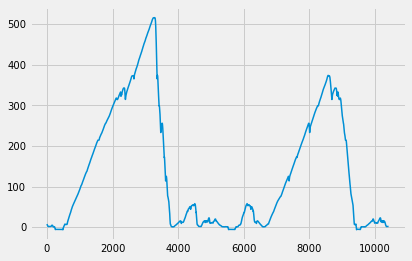

In [222]:
plt.plot(x["altitude"])

In [123]:
(100*(x["altitude"].diff().fillna(0.01)/(x["distance"].diff().fillna(0.001) + 0.01))).describe()

count     26665.000000
mean         18.394678
std        2129.609152
min      -10000.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      342000.000000
dtype: float64

In [118]:
fit_file_points[fit_file_points["grade"].notna()][["FileName", "Activity Name", "distance", "altitude"]].dropna(how = "any")[["FileName", "Activity Name"]].drop_duplicates()

FileName                                      Activity Name
24      10057687651.fit                                  Day 1: Verso Asti
21586   10057691840.fit                                 Day 2: Monferrato 
39156   10112528019.fit                                       Morning Ride
45291   10193450347.fit    Unico giro sotto i 100 km con salite da Milano?
60372   10327150072.fit  Affezionato alla Brianza + giro turistico in c...
76748   10527301818.fit                           Long time no see Brianza
89198   10710188514.fit                                  IL LOMBARDIA 2023
115858  10755123838.fit         Se fori fori nel punto pi√π lontano da casa
140438  10876234942.fit                                  In paradiso day 1
149777  10876244654.fit                                     A spasso day 2
640503   9293279157.fit                                   Back on the road
647007   9323764869.fit                      Caldo e vento sugli Euganeiüî•üå¨
660135   9364127943.fit                                 Long Ride di Marzo
679297   9380658757.fit                         Azzardando ghiaini a Teolo
686999   9399007407.fit                                   Ultima in Veneto
697025   9501575839.fit                       Monte Berico di Sabato Santo
708391   9545958229.fit                                  Como in chillüöµ‚Äç‚ôÇÔ∏è
725971   9722381796.fit                                        Rechargingüîã
728903   9769702970.fit                        Afternoon Ride in the rainüåß
737803   9776976940.fit     Peccato per il Giro ma bella per prof. Mazzari
755890   9824696756.fit                  Milano e la sua pellicola di smog
762062   9858640064.fit                   Il pavese come la bassa veronese
775122   9912835482.fit                 Attorno a San Siro prima della UCL

In [227]:
x.isnull().sum()[:25]

FileName                         0
latitude                         0
longitude                        0
lap                              0
altitude                         0
cadence                          0
calories                     10414
compressed_speed_distance    10414
cycle_length                 10414
distance                         0
enhanced_altitude                0
enhanced_speed                   0
grade                        10414
heart_rate                       0
position_lat                     0
position_long                    0
power                            0
resistance                   10414
speed                        10414
temperature                  10414
time_from_course             10414
timestamp                        0
Activity ID                      0
Activity Date                    0
Activity Name                    0
dtype: int64

In [231]:
(3.6*x["enhanced_speed"]).mean()

25.24964121375072

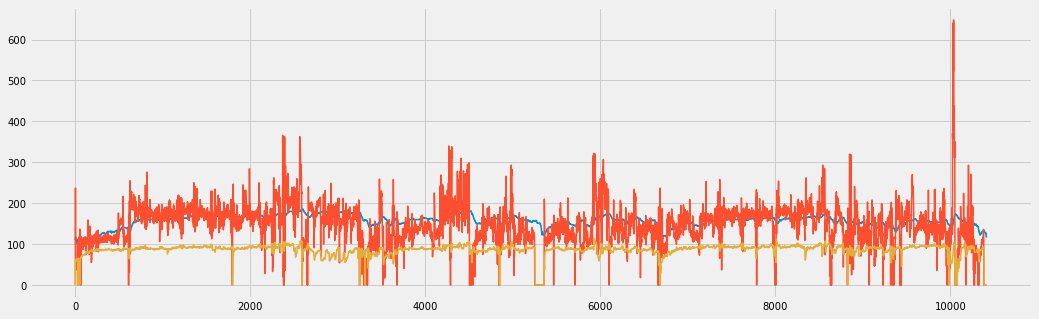

In [237]:
plt.figure(figsize = (16, 5))
# plt.plot((3.6*x["enhanced_speed"]))
# plt.plot(x["enhanced_altitude"])
plt.plot(x["heart_rate"])
plt.plot(x["power"])
plt.plot(x["cadence"])

In [212]:
# Data manipulation
# ==============================================================================
from skforecast.datasets import fetch_dataset

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

print('Skforecast version: ', skforecast.__version__)

Skforecast version:  0.12.1


In [154]:
x[x["speed"] > 0]["speed"].describe()*3.6

count    95043.600000
mean        19.185937
std          7.617514
min          2.008800
25%         13.957200
50%         20.448000
75%         24.447600
max         51.138000
Name: speed, dtype: float64

In [160]:
x["cadence"] = x["cadence"].fillna(0)
x["altitude"] = x["altitude"].bfill()
x["heart_rate"] = x["heart_rate"].bfill()

C:\Users\matti\AppData\Local\Temp\ipykernel_18792\1754506508.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x["altitude"] = x["altitude"].fillna(method = "bfill")


In [166]:
x[["cadence", "calories", "distance", "altitude", "grade", "heart_rate", "speed", "temperature"]].isnull().sum()

cadence        0
calories       0
distance       0
altitude       0
grade          0
heart_rate     0
speed          0
temperature    0
dtype: int64

In [282]:
feature_cols = ['altitude', 'cadence', 'distance',
                'enhanced_speed', 'heart_rate', 'power']

C:\Users\matti\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

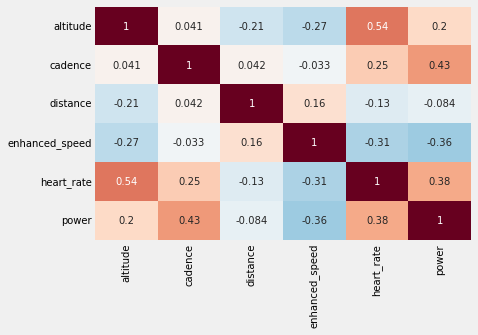

In [279]:
sns.heatmap(x[feature_cols].corr(), annot = True, cmap = "RdBu_r", vmin = -1, vmax = 1, cbar = False)

In [280]:
x.shape

(10414, 116)

Train dates : 0 --- 7413  (n=7414)
Test dates  : 7414 --- 10413  (n=3000)


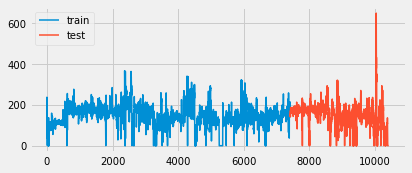

In [284]:
# Split data into train-test
# ==============================================================================
steps = 3000
data_train = x[feature_cols][:-steps]
data_test  = x[feature_cols][-steps:]
print(
    f"Train dates : {data_train.index.min()} --- "
    f"{data_train.index.max()}  (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- "
    f"{data_test.index.max()}  (n={len(data_test)})"
)

fig, ax = plt.subplots(figsize=(6, 2.5))
data_train['power'].plot(ax=ax, label='train')
data_test['power'].plot(ax=ax, label='test')
ax.legend();

In [285]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(random_state=123,
                                                   max_features = len(feature_cols) - 1,
                                                  n_jobs = -1),
                 lags      = 20
             )
forecaster.fit(y=data_train['power'])
forecaster

ForecasterAutoreg 
Regressor: RandomForestRegressor(max_features=5, n_jobs=-1, random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
Transformer for y: None 
Transformer for exog: None 
Window size: 20 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 7413] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 5, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-07-09 22:59:15 
Last fit date: 2024-07-09 22:59:16 
Skforecast v

In [286]:
# Predictions
# ==============================================================================
steps = 5000
predictions = forecaster.predict(steps=steps)
predictions.head(5)

7414    185.24
7415    183.69
7416    183.42
7417    184.84
7418    185.12
Name: pred, dtype: float64

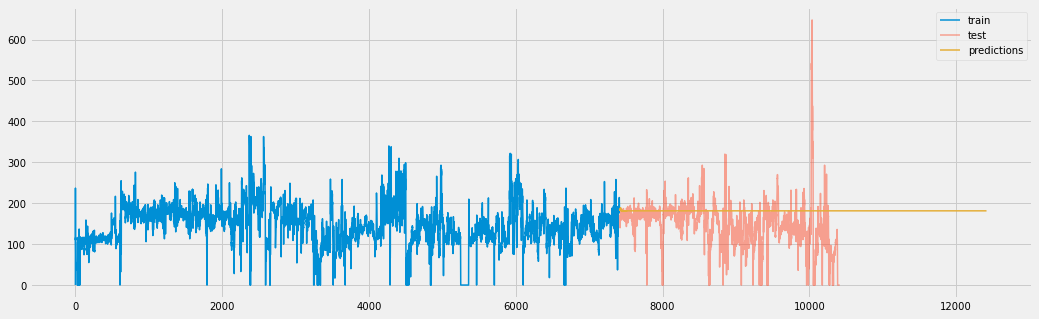

In [287]:
# Plot predictions versus test data
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
data_train['power'].plot(ax=ax, label='train')
data_test['power'].plot(ax=ax, label='test', alpha = .5)
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [198]:
def preprocessing(lst):
    
    out = []
    for d in lst:
        if d["power"].isnull().sum() == 0:
            # print(d["FileName"].values[0])        
            dd = d.copy().reset_index(drop = True)
            dd["heart_rate"] = dd["heart_rate"].astype(int)
            dd["grade"] = (dd["altitude"].diff().fillna(0.01)/(dd["distance"].diff().fillna(0.01) + 0.1))
            dd.loc[dd["grade"] > 25,  "grade"] = 25
            dd.loc[dd["grade"] < -25, "grade"] = -25

            dd = dd.dropna(axis = 1, how = "all")
            dd = dd.sort_values("timestamp").reset_index(drop = True)

            dd_3s = dd.set_index("timestamp").drop("FileName", axis = 1).resample('3s', offset="0.1s",
                                                                                  origin = "start").mean()
            dd_3s = dd_3s.dropna(how = "all")
            dd_3s = dd_3s[dd_3s["power"] > 0].reset_index(drop = True)

            out += [dd_3s]
        
    return pd.concat(out, ignore_index = True)

In [69]:
# list_of_dfs_fit_points[0].head()

In [199]:
Xy = preprocessing(list_of_dfs_fit_points)

C:\Users\matti\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


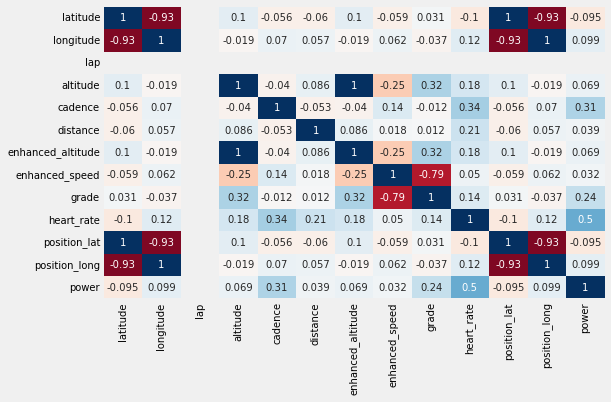

In [200]:
plt.figure(figsize = (8, 5))
sns.heatmap(Xy.corr(), vmin = -1, vmax = 1, cbar = False, annot = True, cmap = "RdBu")
plt.show()

In [201]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

X = Xy[["heart_rate", "enhanced_speed", "cadence", "grade"]].copy()
y = Xy["power"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)

[  0.88421898   5.02341121   0.59511101 569.45189369] -93.78712651747864


In [206]:
lr.predict(X_test)* (lr.predict(X_test) > 0)

array([141.4487973 , 101.62434774, 139.05610969, ..., 127.31703116,
       115.2108028 , 121.05792282])

In [207]:
lr_preds = pd.DataFrame({"y_true": y_test, "y_pred": lr.predict(X_test)* (lr.predict(X_test) > 0)})
lr_preds["delta"] = abs(lr_preds["y_true"] - lr_preds["y_pred"])

<AxesSubplot:>

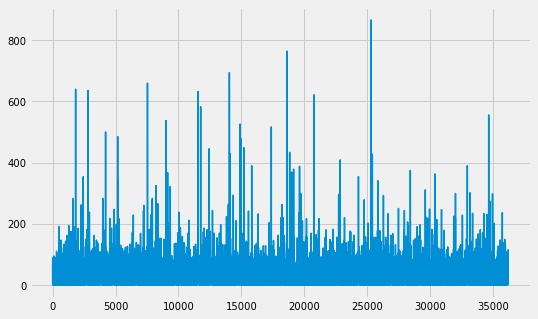

In [208]:
plt.figure(figsize = (8, 5))
lr_preds["delta"].reset_index(drop = True).plot()

<AxesSubplot:>

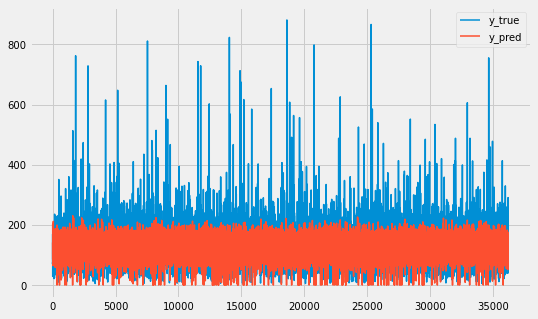

In [209]:
fix, ax = plt.subplots(1, 1, figsize = (8, 5))
lr_preds.reset_index(drop = True).drop("delta", axis = 1).plot(ax = ax)

In [213]:
print("R^2: {:.2f}".format(r2_score(y_test, lr.predict(X_test))))
print("RMSE: {:.2f}".format(root_mean_squared_error(y_test, lr.predict(X_test))))
print("MAE: {:.2f}".format(mean_absolute_error(y_test, lr.predict(X_test))))
print("MAPE: {:.2f} %".format(100*mean_absolute_percentage_error(y_test, lr.predict(X_test))))

R^2: 0.35
RMSE: 37.85
MAE: 24.10
MAPE: 24.87 %


In [214]:
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.python.framework.random_seed import set_random_seed

C:\Users\matti\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\matti\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\matti\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _TENSORSHAPEPROTO_

In [215]:
model = Sequential()
model.add(Dense(input_dim = 4, units = 4, activation = "elu"))
model.add(Dense(units = 4, activation = "elu"))
model.add(Dense(units = 4, activation = "elu"))
model.add(Dense(units = 1, activation = None))
model.compile(loss = "mean_absolute_error", optimizer = "adam",
              metrics = ["mean_absolute_error", "mean_absolute_percentage_error"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [216]:
## Define an Early Stopping
early_stopping = EarlyStopping(monitor = "mean_absolute_error", mode = "min", patience = 20, verbose = 1)

history = model.fit(X_train, y_train, epochs = 1000, batch_size = 100,
                    verbose = 0, validation_split = 0.4, callbacks = [early_stopping])

Epoch 94: early stopping


<AxesSubplot:>

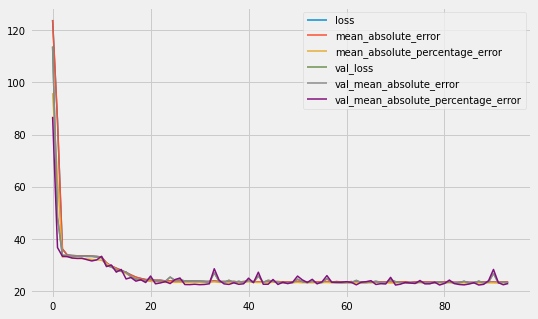

In [217]:
pd.DataFrame(history.history).plot(figsize = (8, 5))

In [219]:
print("RMSE: {:.2f}".format(root_mean_squared_error(y_test, model.predict(X_test))))
print("MAE: {:.2f}".format(mean_absolute_error(y_test, model.predict(X_test))))
print("MAPE: {:.2f} %".format(100*mean_absolute_percentage_error(y_test, model.predict(X_test))))

1132/1132 [==============================] - 1s 1ms/step
RMSE: 36.70
1132/1132 [==============================] - 1s 1ms/step
MAE: 22.97
1132/1132 [==============================] - 1s 1ms/step
MAPE: 22.74 %


$POWER=\frac{9\cdot(6\cdot A\cdot R-b\cdot c)}{26.46\cdot a}$

$R=$

$9^{\frac{1}{3}}$

$x=\frac{1}{1157360400a^3}*[\frac{}{50^{\frac{2}{3}}}-\frac{}{50^{\frac{1}{3}}}+11809799900\cdot a^3\cdot s^3+a^2\cdot b\cdot(11809799900\cdot s^2 - 3936600000\cdot c)+3936599980\cdot a\cdot b^2 \cdot s + 437399997\cdot b^3]$

```python
##########################################
### GET TO DATAFRAME PER EACH GPX FILE ###
##########################################

list_of_dfs_gpx = []
for file in list_of_gpx_files:
    try:
        d_ = parse_gpx.get_dataframe_from_gpx(file)
        list_of_dfs_gpx.append(d_)
    except Exception as e:
        print(file)

list_of_dfs_gpx[0]

from lxml.etree import tostring

gpx = gpxpy.parse(open("\\".join((strava_export, "7501129268.gpx")), 'r'))

print(len(gpx.tracks))
for track in gpx.tracks:
    print(len(track.segments))
    for segment in track.segments:
        print(len(segment.points))
        for point in segment.points:
            
            #print(point.attributes)

            print({'latitude': point.latitude,
            'longitude': point.longitude,
            'elevation': point.elevation,
            'time': point.time,
            'speed': point.speed})
            # print(tostring(point.extensions[0]))
            # # for df in []:
            # #     print(elem.find(f'garmin_tpe:{df}', NAMESPACES).text)


            # NAMESPACES = {'garmin_tpe': 'http://www.garmin.com/xmlschemas/TrackPointExtension/v1'}
            # print(point.extensions[0].find('garmin_tpe:speed', NAMESPACES).text)
```